# Project 8: Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

## Data Import and first Inspection

1. __Import__ the housing dataset (housing.csv) and __inspect__!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [5]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

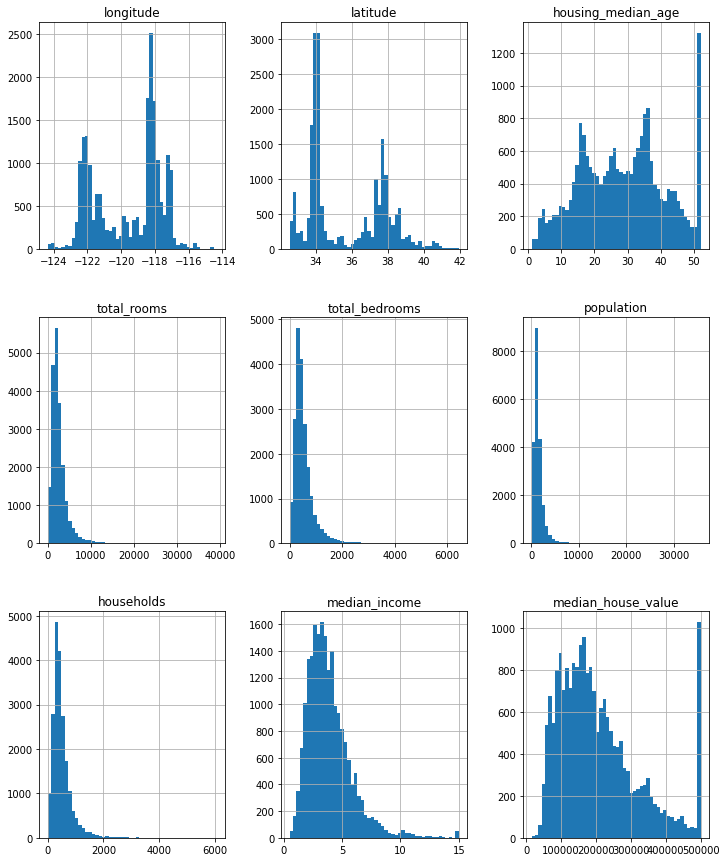

In [6]:
df.hist(bins = 50, figsize = (12,15))

There are outliers in median_house_Value, housing_median_age

<AxesSubplot:>

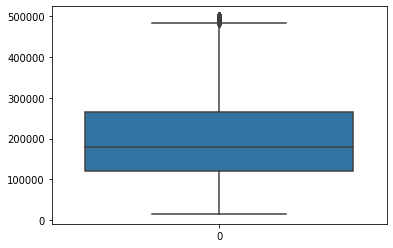

In [7]:
sns.boxplot(data = df.median_house_value)

<AxesSubplot:>

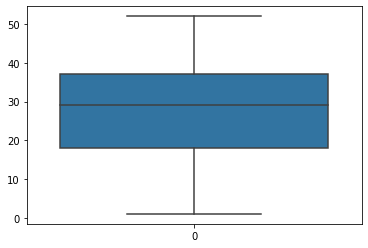

In [8]:
sns.boxplot(data = df.housing_median_age)

## Data Cleaning and Creating additional Features

2. __Drop__ all rows with (at least one) missing value(s).

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
features_with_null = []
for feature in df.columns:
    if df[feature].isnull().sum() >= 1:
        features_with_null.append(feature)
        
for feature in features_with_null:
    print(feature, np.round(df[feature].isnull().mean(), 4)*100,  ' % missing values')

total_bedrooms 1.0  % missing values


In [11]:
df[df.total_bedrooms.isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [12]:
df.dropna(inplace=True)

In [13]:
df[df.total_bedrooms.isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


3. __Add__ the additional Feature __"rooms_per_household"__ 

In [14]:
df["rooms_per_household"] = df.total_rooms.div(df.households)

In [15]:
df["rooms_per_household"].nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [16]:
df["rooms_per_household"].nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

4. __Add__ the additional Feature __"population_per_household"__

In [17]:
df["population_per_household"] = df.population.div(df.households)

<AxesSubplot:>

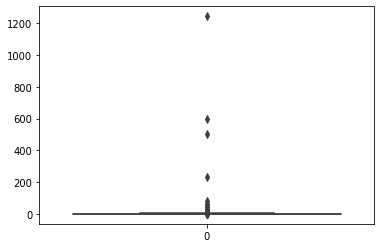

In [18]:
sns.boxplot(data = df["population_per_household"])

5. __Add__ the additional Feature __"bedrooms_per_household"__ 

In [19]:
df["bedrooms_per_household"] = df.total_bedrooms.div(df.households)

## Which Factors influence House Prices?

6. __Calculate__ the __Correlation__ between "median_house_value" and all features. Which factors seems to influence house prices/values?

In [20]:
df.corr().median_house_value.sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
bedrooms_per_household     -0.046739
latitude                   -0.144638
Name: median_house_value, dtype: float64

7. __Create__ a Seaborn Regression plot (__jointplot__) with income on the x-axis and house value on the y-axis.

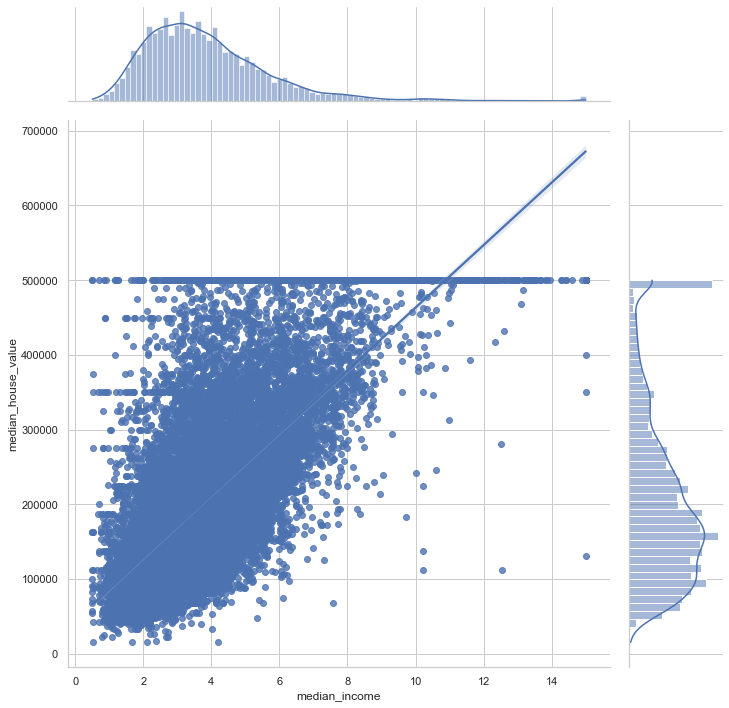

In [21]:
sns.set(style = "whitegrid")
sns.jointplot(data = df, x = df.median_income, y = df.median_house_value , kind = "reg", height = 10)

8. __Create__ the following __scatterplot__ (df.plot(kind = "scatter")) with
- longitude on x-axis
- latitude on y-axis
- size (s) of data points determined by population
- color (c) of data points determined by median_house_value

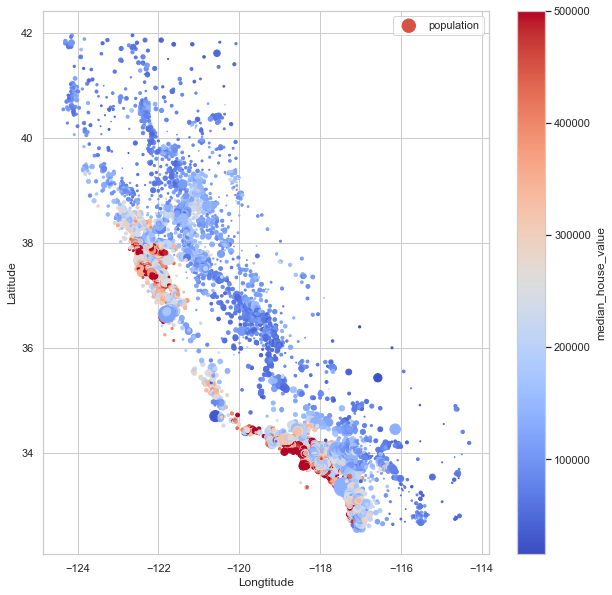

In [22]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", s = df["population"].div(100), c = "median_house_value", figsize = (10,10),
       colorbar = True, cmap = "coolwarm", label = "population", sharex = False)
plt.ylabel("Latitude")
plt.xlabel("Longtitude")
plt.legend()
plt.show()

9. __Add the map__ of California saved in __california.png__.

Hint: You can load and display the image california.png with the right latitude/longitude as follows:

<Figure size 1080x720 with 0 Axes>

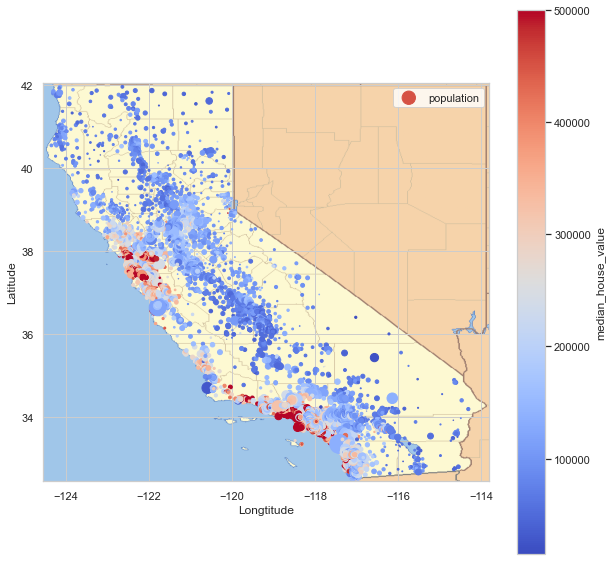

In [23]:
plt.figure(figsize = (15, 10))
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")

df.plot(kind = "scatter", x = "longitude", y = "latitude", s = df["population"].div(100), c = "median_house_value", figsize = (10,10),
       colorbar = True, cmap = "coolwarm", label = "population", sharex = False)


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.ylabel("Latitude")
plt.xlabel("Longtitude")
plt.legend()

plt.show()

## Advanced Explanatory Data Analyis with Seaborn

10. __Add__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [24]:
df["income_cat"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                          labels = ["Low", "Below Average", "Above Average", "High", "Very High"])

In [25]:
df.income_cat.value_counts(normalize = True)

Low              0.250037
Above Average    0.250037
Below Average    0.249988
High             0.199922
Very High        0.050017
Name: income_cat, dtype: float64

11. __Create__ (and interpret) the following Seaborn __Countplots__:

<AxesSubplot:xlabel='income_cat', ylabel='count'>

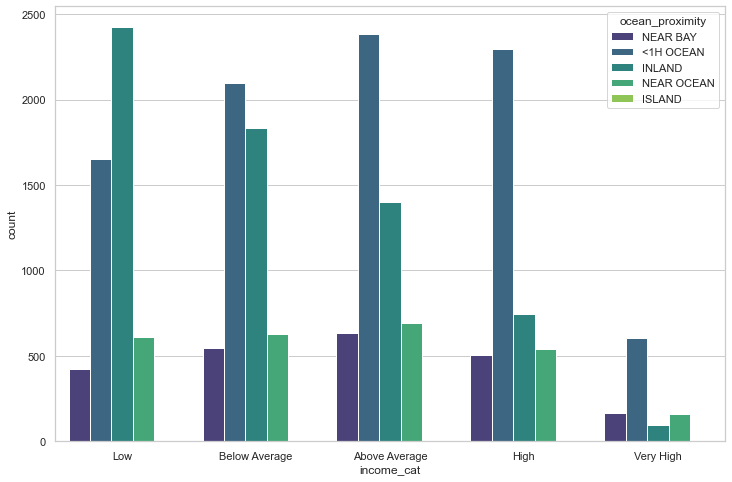

In [26]:
plt.figure(figsize = (12,8))
sns.countplot(x = "income_cat", hue = "ocean_proximity", data = df, palette = "viridis")

<AxesSubplot:xlabel='income_cat', ylabel='median_house_value'>

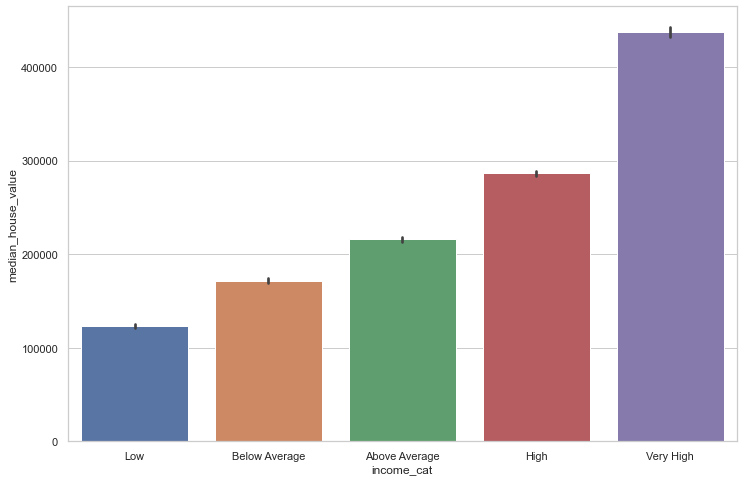

In [27]:
plt.figure(figsize = (12,8))
sns.barplot(x = "income_cat", y = "median_house_value", data = df)

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

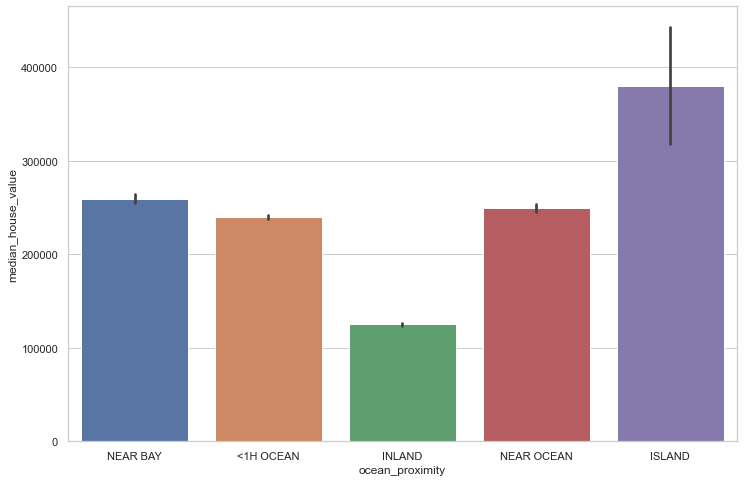

In [28]:
plt.figure(figsize = (12,8))
sns.barplot(x = "ocean_proximity", y = "median_house_value", data = df)

12. __Create__ (and interpret) the following Seaborn __Heatmap__ with mean house values for all combinations of income_cat & ocean_proximity:

In [29]:
matrix = df.groupby(by = ["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = "ISLAND")

In [30]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 5 entries, Low to Very High
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   <1H OCEAN   5 non-null      float64
 1   INLAND      5 non-null      float64
 2   NEAR BAY    5 non-null      float64
 3   NEAR OCEAN  5 non-null      float64
dtypes: float64(4)
memory usage: 377.0 bytes


In [31]:
matrix.astype("int")

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337,84820,155122,148027
Below Average,197236,115124,220196,208665
Above Average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very High,439784,347571,451015,468739


<AxesSubplot:xlabel='ocean_proximity', ylabel='income_cat'>

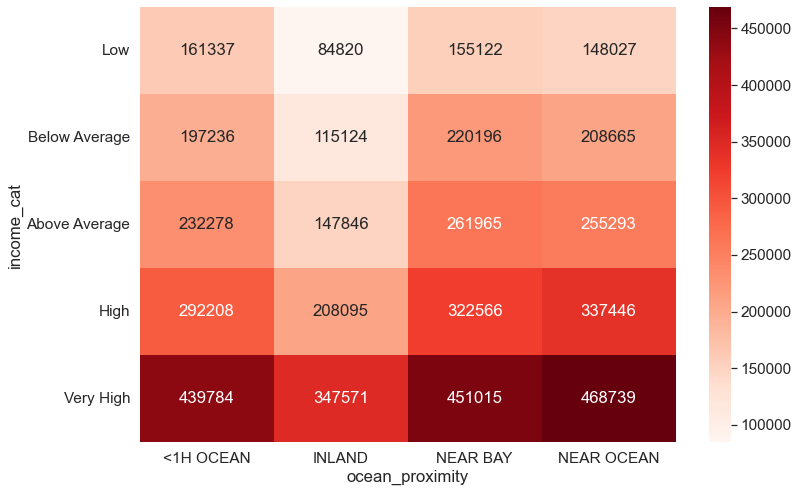

In [32]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.4)
sns.heatmap(data = matrix.astype("int"), annot = True, cmap = "Reds", fmt = "d")

## Machine Learning - Predicting House Values

In [33]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,1.023810,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.971880,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,1.073446,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,1.073059,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,1.081081,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,1.133333,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,1.315789,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,1.120092,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,1.171920,Low


In [34]:
labels = df.median_house_value
labels

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [35]:
features = df.drop(columns = "median_house_value")
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,1.023810,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,0.971880,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,1.073446,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,1.073059,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,1.081081,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,2.560606,1.133333,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,3.122807,1.315789,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,2.325635,1.120092,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,2.123209,1.171920,Low


In [36]:
features.select_dtypes("float")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,1.081081
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,1.133333
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,1.315789
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,1.120092
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,1.171920


In [37]:
import scipy.stats as stats

In [38]:
scaled_num_features = features.select_dtypes("float").apply(lambda x: stats.zscore(x))

In [39]:
scaled_num_features.agg(["mean","std"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
mean,-8.457103e-16,1.535632e-15,5.007495e-17,-3.407879e-17,-7.233049e-17,-8.067632e-17,-6.676661e-17,2.948858e-16,-1.390971e-18,-3.407879e-17,9.875894e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00


In [40]:
pd.options.display.float_format = '{:.2f}'.format

In [41]:
scaled_num_features.agg(["mean","std"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [42]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [43]:
dummies = pd.get_dummies(features.ocean_proximity)

__=> Should delete one columns to avoid multicollinearity. However, using random forest, don't need to delete__

In [44]:
features = pd.concat([scaled_num_features, dummies, df.income_cat], axis =1)

In [45]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-0.15,0,0,0,1,0,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.26,0,0,0,1,0,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-0.05,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.05,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.03,0,0,0,1,0,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.08,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.46,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.05,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.16,0,1,0,0,0,Low


In [46]:
X_test = features.sample(frac = 0.2)

In [47]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
4783,0.62,-0.75,0.82,0.09,0.68,0.43,0.49,-1.04,-0.52,-0.03,0.22,1,0,0,0,0,Low
12119,1.18,-0.78,-2.04,7.19,4.74,6.19,4.82,0.93,0.97,0.05,-0.03,0,1,0,0,0,High
7408,0.67,-0.78,0.51,-0.55,-0.15,0.61,-0.04,-0.66,-0.99,0.12,-0.25,1,0,0,0,0,Below Average
18940,-1.24,1.23,-1.16,1.96,1.09,1.56,1.25,0.63,0.66,0.02,-0.17,0,1,0,0,0,High
6330,0.81,-0.77,-0.84,1.58,1.14,1.49,1.26,0.59,0.31,0.01,-0.13,1,0,0,0,0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11454,0.78,-0.92,-1.00,0.43,0.57,0.19,0.72,0.62,-0.32,-0.09,-0.19,0,0,0,0,1,High
12107,1.12,-0.77,-0.13,1.29,0.74,0.86,0.88,0.44,0.44,-0.02,-0.17,0,1,0,0,0,Above Average
19642,-0.62,0.89,-1.08,-0.95,-0.98,-1.09,-1.03,-1.05,-0.04,-0.13,0.11,0,1,0,0,0,Low
8978,0.58,-0.76,0.74,-1.06,-1.11,-1.02,-1.12,-0.70,-0.40,0.06,-0.29,1,0,0,0,0,Low


In [48]:
X_test.income_cat.value_counts(normalize = True)

Above Average   0.25
Low             0.25
Below Average   0.24
High            0.20
Very High       0.05
Name: income_cat, dtype: float64

In [49]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [50]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-0.15,0,0,0,1,0,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.26,0,0,0,1,0,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-0.05,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.05,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.03,0,0,0,1,0,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20632,-0.94,1.70,-1.08,-0.15,-0.29,-0.33,-0.30,-0.39,0.24,-0.03,-0.03,0,1,0,0,0,Below Average
20634,-0.99,1.70,-0.05,-0.14,-0.34,-0.34,-0.41,-0.08,0.54,-0.00,0.11,0,1,0,0,0,Above Average
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.05,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.16,0,1,0,0,0,Low


In [51]:
X_train.income_cat.value_counts(normalize = True)

Below Average   0.25
Low             0.25
Above Average   0.25
High            0.20
Very High       0.05
Name: income_cat, dtype: float64

### Shuffle X_train

In [52]:
X_train = X_train.sample(frac = 1)

In [54]:
X_train.drop(columns = "income_cat",axis = 1, inplace = True)
X_test.drop(columns = "income_cat",axis = 1, inplace = True)

In [55]:
y_train = labels.loc[X_train.index]
y_test = labels.loc[X_test.index]

### Random Forest Regressor

use when see that some features affect label in non-linear way

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
forest_reg = RandomForestRegressor()

In [59]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

#### Evaluate train dataset

In [60]:
# Coefficient
forest_reg.score(X_train, y_train)

0.9744309656061134

In [65]:
# Mean sqauared error
from sklearn.metrics import mean_squared_error
pred = forest_reg.predict(X_train)

forest_mse = mean_squared_error(y_train, pred)
print("MSE: " + str(forest_mse))

forest_rmse = np.sqrt(forest_mse)
print("RMSE: " + str(forest_rmse))

MSE: 342430918.0272458
RMSE: 18504.88903039534


### Evaluate model on the test dataset

In [66]:
# Coefficient
forest_reg.score(X_test, y_test)

0.8125816246108444

In [67]:
# Mean sqauared error
from sklearn.metrics import mean_squared_error
pred = forest_reg.predict(X_test)

forest_mse = mean_squared_error(y_test, pred)
print("MSE: " + str(forest_mse))

forest_rmse = np.sqrt(forest_mse)
print("RMSE: " + str(forest_rmse))

MSE: 2446555832.2406225
RMSE: 49462.67109892694


In [68]:
comp = pd.DataFrame(data = {"True_value": y_test, "Predicted": pred})

In [70]:
comp["residual"] =  comp.True_value.sub(comp.Predicted).abs()

In [73]:
print("Mean of residuals is: " + str((comp["residual"].mean())))

Mean of residuals is: 32401.78672865182


### Feature Importance

In [76]:
forest_reg.feature_importances_

array([6.17194297e-02, 5.76050035e-02, 4.26532586e-02, 1.25920243e-02,
       1.16945080e-02, 1.16409612e-02, 1.04319784e-02, 4.75946270e-01,
       2.94021101e-02, 1.19661952e-01, 2.42353073e-02, 1.17955197e-03,
       1.38356003e-01, 4.31382236e-05, 7.49071408e-04, 2.08943266e-03])

In [79]:
feature_importance = pd.Series(data = forest_reg.feature_importances_, index = X_train.columns)

<AxesSubplot:>

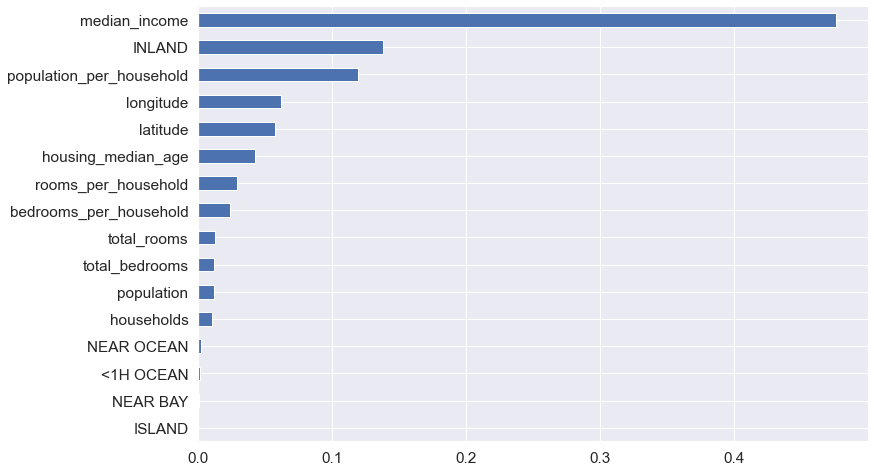

In [85]:
feature_importance.sort_values().plot.barh(figsize = (12,8))